In [1]:
import statsmodels.api as sm 
import numpy as np
import scipy.stats as spstats
import matplotlib.pyplot as plt
import matplotlib as mpl


%matplotlib inline

//anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Text(0.5,1,'The Sample has thinner tail ')

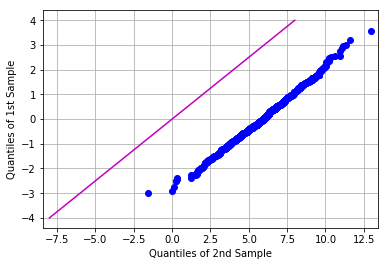

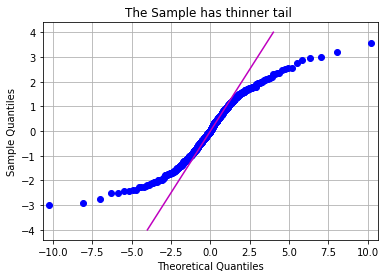

In [2]:
# normality check  
# qq plot

rn1= np.random.randn(1000)
rn2= np.random.randn(1000)*2+6

sm.qqplot_2samples( rn1, rn2)
x= np.linspace(-4,4,100)
plt.plot(2* x,x, 'm')
plt.grid(True)


sm.qqplot( rn1, spstats.t, distargs=(3, ))
plt.grid(True)
x= np.linspace(-4,4,100)
plt.plot(x,x, 'm')
plt.title('The Sample has thinner tail ')

Text(0.5,1,'The sample has fatter tail')

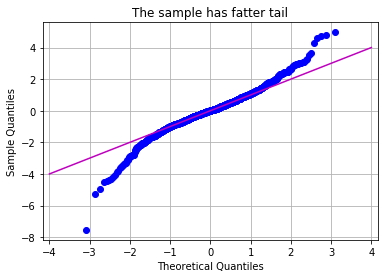

In [3]:
rn2= np.random.standard_t(5, 1000)

sm.qqplot( rn2, spstats.norm )
plt.grid(True)
x= np.linspace(-4,4,1000)
plt.plot(x,x, 'm')
plt.title('The sample has fatter tail')

In [4]:
## distribution stats

# skewness= mu_3/ (mu_2)^(3/2). It measures how asymmetric the distribution is. 
# Positive skew means mean> median. Negative skew means mean< median

spstats.skew( rn2)
spstats.skewtest( rn2)
# pvalue refers the prob that we wrongly reject the null hypothesis that the sample has same skewness as normal 


SkewtestResult(statistic=-4.143902636358781, pvalue=3.414447570741452e-05)

In [5]:

# kurtosis= mu_4/ (mu_2)^2. It measures how centrated the distribution is. 
# Along with Fisher's definition, normal distribution is treated as benchmark, and has 0 kurtosis.

spstats.kurtosis( rn2)
spstats.kurtosistest( rn2)

KurtosistestResult(statistic=8.551525481485045, pvalue=1.2147225076097686e-17)

In [6]:
# The nomaltest combines skew test and kurtosis test to check whether the sample is from a normal distribution 

spstats.normaltest(rn2)
# we can see even we use  a sample of t(df=10 ) which is near to normal, the test rejects the normal assumption. 

NormaltestResult(statistic=90.3005171201093, pvalue=2.463155618950203e-20)

In [7]:


# Portfolio Management: Efficient Frontier
import quandl as qdl


In [8]:
# qdlKey= 'iz3gpGtYiTWsRDWdgpaD'

xomToken=  'WIKI/XOM'
aaplToken= 'WIKI/AAPL'
msftToken= 'WIKI/MSFT'
gsToken=   'WIKI/GS'
# gldToken=  'WIKI/GLD'

startdate= '2011-01-01'
enddate=   '2018-01-01'


Data= qdl.get([aaplToken, msftToken, gsToken, xomToken],
              start_date= startdate, 
                 end_date= enddate, 
              #authtoken= qdlKey
             )


In [9]:
Data

,WIKI/AAPL - Open,WIKI/AAPL - High,WIKI/AAPL - Low,WIKI/AAPL - Close,WIKI/AAPL - Volume,WIKI/AAPL - Ex-Dividend,WIKI/AAPL - Split Ratio,WIKI/AAPL - Adj. Open,WIKI/AAPL - Adj. High,WIKI/AAPL - Adj. Low,...,WIKI/XOM - Low,WIKI/XOM - Close,WIKI/XOM - Volume,WIKI/XOM - Ex-Dividend,WIKI/XOM - Split Ratio,WIKI/XOM - Adj. Open,WIKI/XOM - Adj. High,WIKI/XOM - Adj. Low,WIKI/XOM - Adj. Close,WIKI/XOM - Adj. Volume
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-03,325.6400,330.2600,324.8365,329.570,15897800.0,0.0,1.0,41.849279,42.443013,41.746018,...,73.6400,74.55,23320700.0,0.00,1.0,59.743097,60.610230,59.678264,60.415733,23320700.0
2011-01-04,332.4400,332.5000,328.1500,331.290,11038600.0,0.0,1.0,42.723173,42.730884,42.171849,...,74.4200,74.90,20028500.0,0.00,1.0,60.545398,60.739895,60.310380,60.699375,20028500.0
2011-01-05,329.5500,334.3400,329.5000,334.000,9125700.0,0.0,1.0,42.351768,42.967350,42.345342,...,74.1400,74.70,16550800.0,0.00,1.0,60.512982,60.675063,60.083467,60.537294,16550800.0
2011-01-06,334.7194,335.2500,332.9000,333.730,10729600.0,0.0,1.0,43.016108,43.084298,42.782290,...,74.6700,75.18,22525300.0,0.00,1.0,60.699375,61.128890,60.512982,60.926289,22525300.0
2011-01-07,333.9900,336.3500,331.9000,336.120,11140400.0,0.0,1.0,42.922370,43.225663,42.653776,...,75.0900,75.59,19297700.0,0.00,1.0,60.950601,61.509781,60.853352,61.258555,19297700.0
2011-01-10,338.8300,343.2300,337.1700,342.455,16020000.0,0.0,1.0,43.544377,44.109839,43.331044,...,74.5800,75.13,20766400.0,0.00,1.0,60.885768,60.999225,60.440045,60.885768,20766400.0
2011-01-11,344.8800,344.9600,339.4700,341.640,15861000.0,0.0,1.0,44.321887,44.332168,43.626626,...,75.0200,75.69,15805400.0,0.00,1.0,60.796624,61.477364,60.796624,61.339595,15805400.0
2011-01-12,343.2500,344.4300,342.0000,344.420,10806800.0,0.0,1.0,44.112409,44.264056,43.951767,...,75.6700,76.58,17363000.0,0.00,1.0,61.542197,62.093273,61.323387,62.060856,17363000.0
2011-01-13,345.1600,346.6400,343.8500,345.680,10599300.0,0.0,1.0,44.357871,44.548071,44.189517,...,75.9800,76.71,20438100.0,0.00,1.0,62.117585,62.255354,61.574613,62.166209,20438100.0


In [10]:
indx= np.logical_and(Data.index>= startdate,  Data.index< enddate) 
mktData= Data.ix[indx]
mktData.tail()
mktData.head()
a= [10, 22, 34, 46 ]
print(mktData.columns[a])

mktData= mktData.ix[:, a]
mktData

Index(['WIKI/AAPL - Adj. Close', 'WIKI/MSFT - Adj. Close',
       'WIKI/GS - Adj. Close', 'WIKI/XOM - Adj. Close'],
      dtype='object')


//anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
//anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,WIKI/AAPL - Adj. Close,WIKI/MSFT - Adj. Close,WIKI/GS - Adj. Close,WIKI/XOM - Adj. Close
Date,,,,
2011-01-03,42.354338,23.211568,157.879190,60.415733
2011-01-04,42.575382,23.300747,157.906560,60.699375
2011-01-05,42.923655,23.228159,158.745906,60.537294
2011-01-06,42.888956,23.908412,157.112830,60.926289
2011-01-07,43.196105,23.725905,155.726085,61.258555
2011-01-10,44.010241,23.410666,154.877615,60.885768
2011-01-11,43.905502,23.319413,154.512682,61.339595
2011-01-12,44.262770,23.684427,156.620171,62.060856
2011-01-13,44.424698,23.385779,156.528937,62.166209


In [11]:
mktData.columns= ['AAPL', 'MSFT', 'GS',  'XOM']
for colName in mktData.columns:
    ts= mktData[colName]
    mktData[colName+'_ret']= np.log( ts/ts.shift(1) )
mktData= mktData.dropna(axis=0, how='any')
mktData

,AAPL,MSFT,GS,XOM,AAPL_ret,MSFT_ret,GS_ret,XOM_ret
Date,,,,,,,,
2011-01-04,42.575382,23.300747,157.906560,60.699375,0.005205,0.003835,0.000173,0.004684
2011-01-05,42.923655,23.228159,158.745906,60.537294,0.008147,-0.003120,0.005301,-0.002674
2011-01-06,42.888956,23.908412,157.112830,60.926289,-0.000809,0.028865,-0.010341,0.006405
2011-01-07,43.196105,23.725905,155.726085,61.258555,0.007136,-0.007663,-0.008866,0.005439
2011-01-10,44.010241,23.410666,154.877615,60.885768,0.018672,-0.013376,-0.005463,-0.006104
2011-01-11,43.905502,23.319413,154.512682,61.339595,-0.002383,-0.003906,-0.002359,0.007426
2011-01-12,44.262770,23.684427,156.620171,62.060856,0.008104,0.015532,0.013547,0.011690
2011-01-13,44.424698,23.385779,156.528937,62.166209,0.003652,-0.012690,-0.000583,0.001696
2011-01-14,44.784537,23.477032,159.658239,63.081967,0.008067,0.003894,0.019795,0.014623


//anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


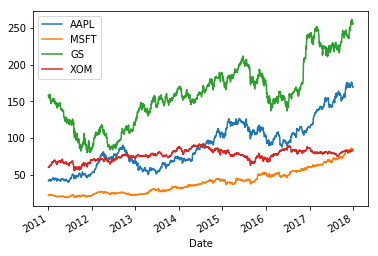

In [12]:
mktData.ix[:, 0:4].plot()

In [13]:
retData= mktData.ix[:, 4:]
Omega= retData.cov()*252
# Omega= np.array(Omega)
Omega

,AAPL_ret,MSFT_ret,GS_ret,XOM_ret
AAPL_ret,0.063064,0.020868,0.021607,0.013573
MSFT_ret,0.020868,0.049889,0.025392,0.016958
GS_ret,0.021607,0.025392,0.066197,0.024673
XOM_ret,0.013573,0.016958,0.024673,0.032882


In [14]:
mu= np.array(retData.mean()*252)
mu

array([0.19532755, 0.18685879, 0.06722459, 0.04710034])

In [15]:
N= 10000
ret= np.ones(N)
sigma= np.ones(N)

for i in range(N):
    w= np.random.random(4); 
    w=w.T
    w= w/(w.sum())
    ret[i]= np.dot(w, mu)
    sigma[i]=np.sqrt( np.dot(np.dot(w, Omega), w))



Text(0.5,1,'Portf Metrics (AAPL, MSFT, GS, XOM, GLD) Sharpe=0.9699238980362603')

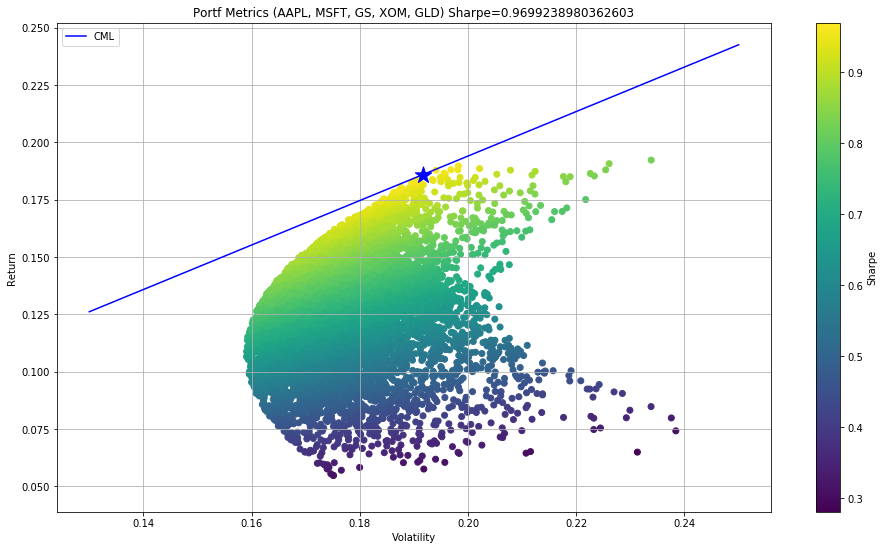

In [16]:
plt.figure(figsize=(16, 9))
plt.scatter(sigma, ret, c= ret/sigma, marker= 'o')
plt.grid(True)
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.colorbar(label= 'Sharpe')
indx=np.argmax(ret/sigma)
plt.scatter(sigma[indx], ret[indx], marker= '*',c='b',  s= 300 )
x= np.linspace(0.13, 0.25, 100)
plt.plot(x, ret[indx]/sigma[indx]* x, 'b', label='CML' )
plt.legend()
plt.title('Portf Metrics (AAPL, MSFT, GS, XOM, GLD) Sharpe='+ str(ret[indx]/sigma[indx]) )




In [17]:
## Note:
# Above plot is typical. Usually when we include more market conditions, the Markovitz frontier may not be very good.
# Just try to include 2008 or 2016. 
# Also note, AAPL has stock split in Jun 2014. Adjust the price if one would like to include this change. 

In [18]:
# Portfolio optimization
# we optimize the sharpe ratio
def negat_SR( w, mu, Omega) :
    ret= np.dot(w, mu)
    sigma= np.sqrt( np.dot( w, np.dot( w.T, Omega )))
    
    return -ret/sigma


In [19]:
import scipy.optimize as spo
constr= {'type': 'eq', 'fun': lambda x: np.sum(x)-1 }
bounds= (0,None), (0, None), (0,None), (0,None)
mktPortf= spo.minimize(negat_SR, (1/4, 1/4,1/4, 1/4), args=(mu, Omega),
                       method='SLSQP', constraints= constr, bounds= bounds)

In [20]:
w=mktPortf.x
mktPortfRet= np.dot(w, mu)
mktPortfSigma= np.sqrt(np.dot(w.T, np.dot( Omega, w)))

In [21]:
mktPortfRet

0.19050874802380746

In [22]:
mktPortfSigma

0.19519814780822425

In [23]:
mktPortfSharpe= mktPortfRet/mktPortfSigma

In [24]:
mktPortfSharpe

0.9759762075763958

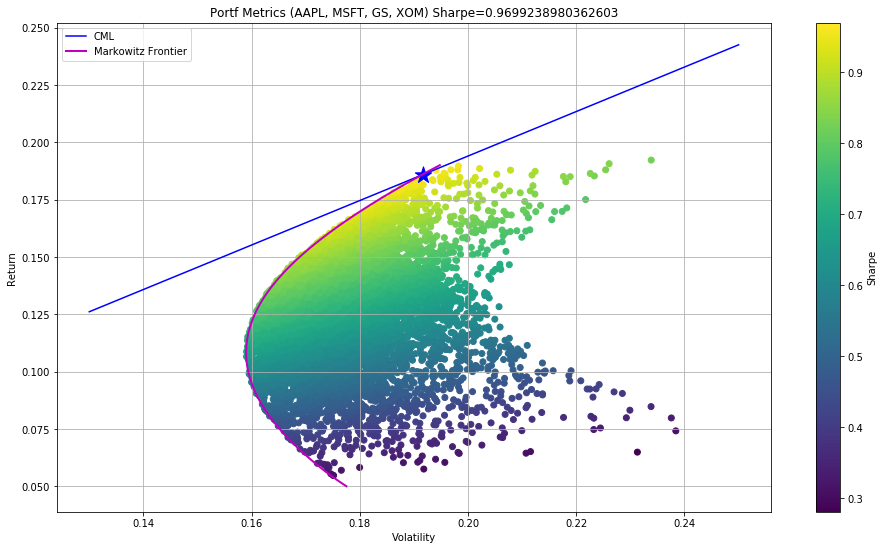

In [25]:
# construct the frontier
import scipy.optimize as spo
r= np.linspace(0.05,0.19, 100)
sig= np.ones(100)
for i in range(100):
    constra= ({'type': 'eq', 'fun': lambda x:  np.dot(x, mu)- r[i]},
              {'type': 'eq', 'fun': lambda x:  np.sum(x)-1})
    bounds=   ( (0,1), (0,1), (0,1), (0,1) )
    
    opt= spo.minimize( negat_SR, (1/4, 1/4, 1/4, 1/4), method='SLSQP',
                        args= (mu, Omega), constraints= constra, bounds= bounds)
    w= opt.x
    sig[i]= np.sqrt( np.dot( w, np.dot(Omega, w)))
    
plt.figure(figsize=(16, 9))
plt.scatter(sigma, ret, c= ret/sigma, marker= 'o')
plt.grid(True)
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.colorbar(label= 'Sharpe')
indx=np.argmax(ret/sigma)
plt.scatter(sigma[indx], ret[indx], marker= '*',c='b',  s= 300 )
x= np.linspace(0.13, 0.25, 100)
plt.plot(x, ret[indx]/sigma[indx]* x, 'b', label='CML' )

plt.title('Portf Metrics (AAPL, MSFT, GS, XOM) Sharpe='+ str(ret[indx]/sigma[indx]) )
plt.plot(sig, r, 'm', linewidth=2, label= 'Markowitz Frontier')
plt.legend()
